In [1]:
import sys
sys.path.insert(1, '../src/')
import config
import utils

In [2]:
import pandas as pd
df = pd.read_csv(config.INPUT_FILE, encoding = 'latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [18]:
df.loc[pd.notna(df['Unnamed: 2'])].head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN


In [3]:
bad_cols = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
# if bad columns have text combine them with the original text in v2
def combine_text(row):
    text = row['v2']
    for col in bad_cols:
        if pd.notna(row[col]):
            text = text + ' ' + row[col]
    row['text'] = text
    return row
    

In [4]:
df.apply(combine_text, axis = 1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,The guy did some bitching but I acted like i'd...


In [40]:
data = df.drop(bad_cols, axis = 1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

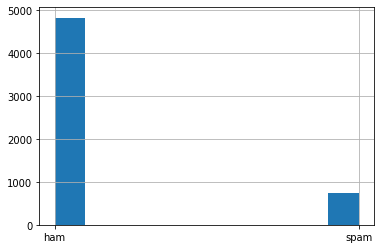

In [42]:
data['v1'].hist()


In [59]:
df = pd.read_csv(os.path.join(config.INPUT_DIR, 'spams_kfolds.csv'))
df.head(5)

,text,kfold,target
0,"Fuck babe, I miss you sooooo much !! I wish yo...",0,0
1,Rightio. 11.48 it is then. Well arent we all u...,0,0
2,Dunno da next show aft 6 is 850. Toa payoh got...,0,0
3,Not yet. Just i'd like to keep in touch and it...,0,0
4,Ok cool. See ya then.,0,0


In [60]:
df = pd.read_csv(os.path.join(config.INPUT_DIR, 'train.csv'))
df

,cleaned_text,kfold,target
0,fuck babe miss sooooo wish sleep bed lone slee...,0,0
1,rightio arent bright earli morn,0,0
2,dunno aft toa payoh,0,0
3,like touch easiest way barcelona way hous,0,0
4,cool,0,0
...,...,...,...
5567,love massag use lot babi oil fave posit,4,0
5568,congratul award voucher gift guarante free ent...,4,1
5569,dude ive lotta corvett late,4,0
5570,good afternoon sexi bun job search wake think ...,4,0


In [5]:

import config
import os
import pandas as pd
import numpy as np
import joblib

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

In [112]:
df = pd.read_csv(os.path.join(config.INPUT_DIR, 'train.csv'))

df_train = df.loc[df['kfold'] != fold].reset_index(drop=True)
df_test  = df.loc[df['kfold'] == fold].reset_index(drop=True)

X_train = df_train['cleaned_text'].values
y_train = df_train['target'].values

X_test = df_test['cleaned_text'].values
y_test = df_test['target'].values

X = np.concatenate([X_train, X_test])

X

array(['fuck babe miss sooooo wish sleep bed lone sleep dream love',
       'rightio arent bright earli morn', 'dunno aft toa payoh', ...,
       'probabl eat today think gon pop weekend miss',
       'track lighter find', 'teach app come colleg'], dtype=object)

In [136]:
 df = pd.read_csv(os.path.join(config.INPUT_DIR, 'train.csv'))

df_train = df.loc[df['kfold'] != fold].reset_index(drop=True)
df_test  = df.loc[df['kfold'] == fold].reset_index(drop=True)

X_train = df_train['cleaned_text'].values
y_train = df_train['target'].values

X_test = df_test['cleaned_text'].values
y_test = df_test['target'].values

X = np.concatenate([X_train, X_test])

print(df.shape)
from nltk.tokenize import word_tokenize

vectorizer_dict = {
    'count':CountVectorizer(tokenizer=word_tokenize),
    'tfidf':TfidfVectorizer(tokenizer=word_tokenize),
}
vectorizer = vectorizer_dict['count']
vectorizer.fit(X)

(5501, 3)


CountVectorizer(tokenizer=<function word_tokenize at 0x7fa2c21dfd30>)

In [137]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [139]:
clf = MultinomialNB()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)


AttributeError: 'CountVectorizer' object has no attribute '__name__'

In [140]:
dir(vectorizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',
 'fixe

In [6]:
import pickle
import preprocessing 
model = joblib.load(open('../models/model_nb_1_count.pkl', 'rb'))
vectorizer = joblib.load(open('../models/vectorizer_nb_count.pkl', 'rb'))

In [9]:
# message_df=pd.DataFrame({'v2':['hey you, sir! what is up with you this beautiful day?']})
message_df=pd.DataFrame({'v2':['Click here and you will win an amazing award click right here']})
X_msg = preprocessing.full_cleaning_routine(message_df, vectorizer = vectorizer, target_col = None, text_col = 'v2')
my_prediction = model.predict(X_msg)

,v2
0,Click here and you will win an amazing award c...


In [10]:
my_prediction

array([1])